In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import pandas as pd
from scipy import stats
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('marketing.csv')

In [3]:
df=data.copy()

####
DESCRIPTIVE STATISTICS

In [4]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


####
CLEANING DATA

In [35]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [36]:
df.dropna(how='any', inplace=True)

In [37]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [38]:
df.duplicated().sum()

0

####
EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Social Media', ylabel='Count'>

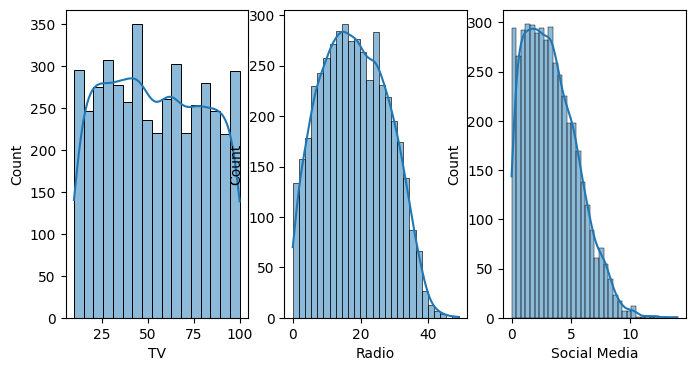

In [44]:
fig, ax = plt.subplots(1,3, figsize=(8,4))
sns.histplot(data=df, x='TV', kde=True, ax=ax[0])
sns.histplot(data=df, x='Radio', kde=True, ax=ax[1])
sns.histplot(data=df, x='Social Media', kde=True, ax=ax[2])

C:\Users\user\AppData\Local\Temp\ipykernel_35132\2419856023.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Influencer', palette=sns.color_palette())
C:\Users\user\AppData\Local\Temp\ipykernel_35132\2419856023.py:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=df, x='Influencer', palette=sns.color_palette())


<Axes: xlabel='Influencer', ylabel='count'>

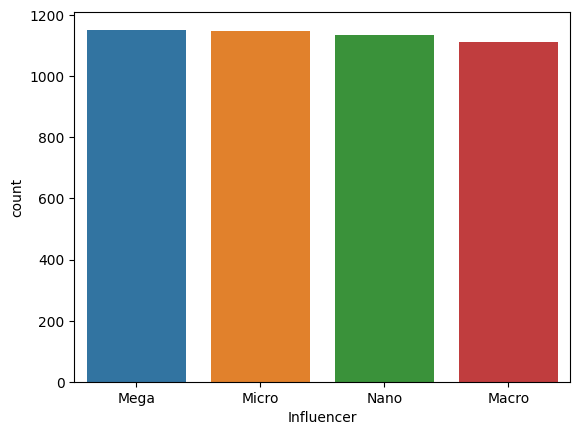

In [47]:
sns.countplot(data=df, x='Influencer', palette=sns.color_palette())

<Axes: xlabel='Social Media', ylabel='Sales'>

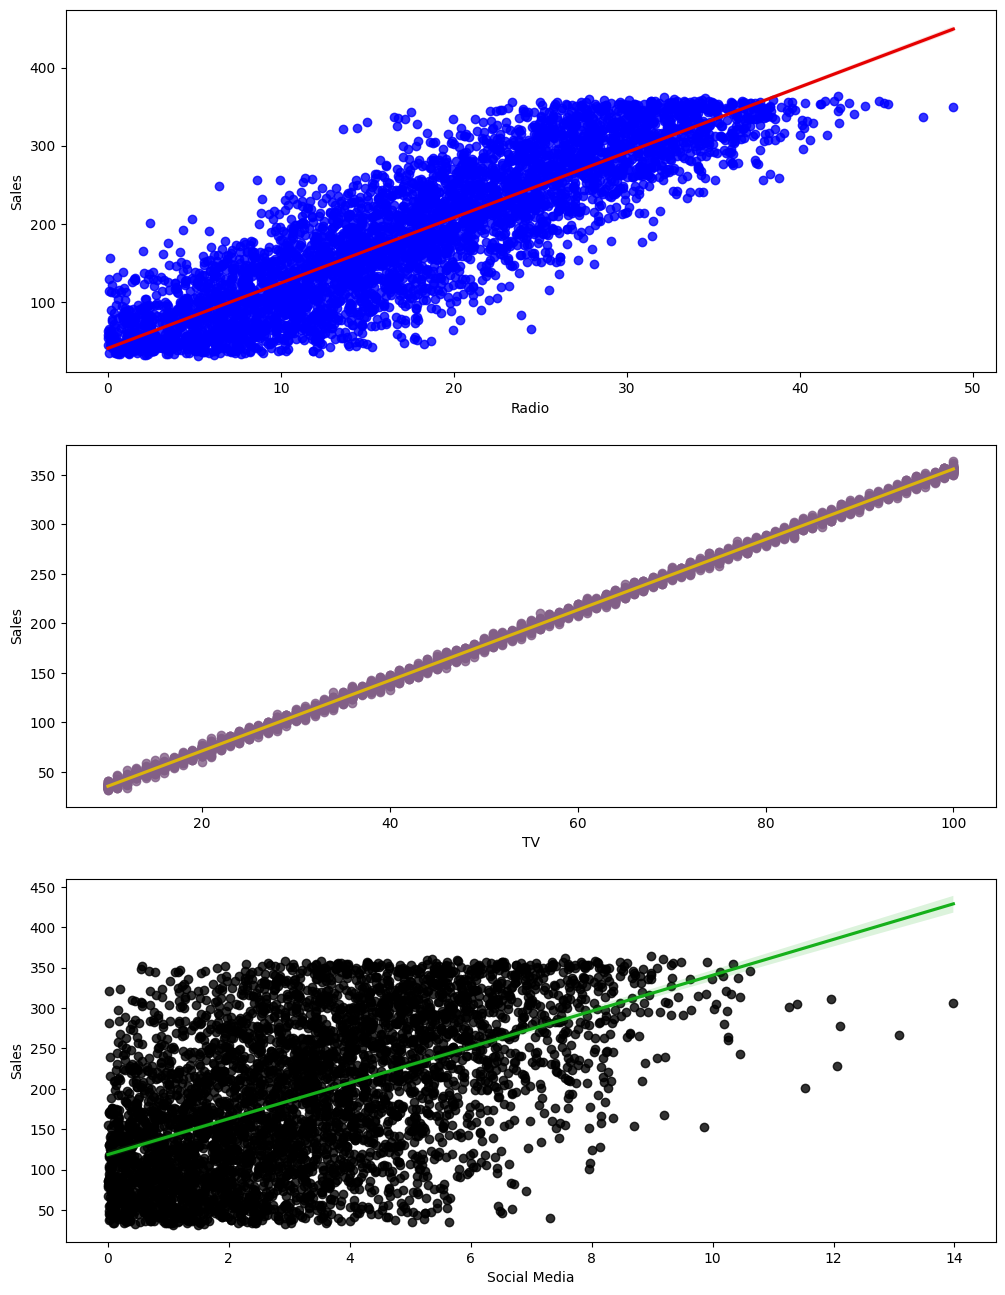

In [48]:
fig, ax = plt.subplots(3,1, figsize=(12,16))
sns.regplot(x=df['TV'], y=df['Sales'], ax=ax[1], order=1, scatter_kws={"color": '#825F87'}, line_kws={"color": "xkcd:gold"})
sns.regplot(x=df['Radio'], y=df['Sales'], ax=ax[0], order=1, scatter_kws={"color": 'blue'}, line_kws={"color": "xkcd:red"})
sns.regplot(x=df['Social Media'], y=df['Sales'], ax=ax[2], order=1, scatter_kws={"color": 'black'}, line_kws={"color": "xkcd:green"})

####
Analisis pengaruh melalui regresi

In [49]:
df_run=pd.get_dummies(df, prefix='', prefix_sep='')

In [50]:
df_run.head()

,TV,Radio,Social Media,Sales,Macro,Mega,Micro,Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


In [51]:
# Change object datatype to int
df_run["Macro"] = df_run["Macro"].astype(int)
df_run["Mega"] = df_run["Mega"].astype(int)
df_run["Micro"] = df_run["Micro"].astype(int)
df_run["Nano"] = df_run["Nano"].astype(int)

In [53]:
# Create the X and y arrays for the regression
X_1 = df_run.drop(columns=['Sales'])
y_1 = df_run[['Sales']]

X_1 = sm.add_constant(X_1)

# Fit the regression model
model = sm.OLS(y_1, X_1)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.521e+05
Date:                Sun, 12 May 2024   Prob (F-statistic):               0.00
Time:                        15:17:43   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.275e+04
Df Residuals:                    4539   BIC:                         2.279e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1065      0.082     -1.294   